# MNIST 손글씨 - CNN 3

- 2 Conv2D layers
- 1 MaxPooling2D layer
- 1 Dropout(0.25) layer
- 1 Fully Connected Network(512) layer
- 1 Dropout(0.5) layer
- 1 Output layer

In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
seed = 2021
np.random.seed(seed)
tf.random.set_seed(seed)

## 1. 데이터 전처리

In [5]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train.shape, y_train.shape, X_test.shape, y_test.shape 

11493376/11490434 [==============================] - 0s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [6]:
# 0과 1 사이 값으로 정규화
X_train = X_train / 255.0
X_test = X_test /255.0

In [7]:
# 0과 1 사이 값으로 정규화
X_train = X_train / 255.0
X_test = X_test /255.0

In [8]:
# 3차원의 데이터를 4차원으로( 데이터는 2차원을 3차원으로)
# X가 28*28이므로 1차원으로 바꾸어 주어야한다. 28*28=784 
X_train = X_train.reshape(-1,28,28, 1)
X_test = X_test.reshape(-1,28, 28, 1)
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [9]:
# One hot encoding
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

## 2. 모델 정의, 설정, 실행, 평가

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten
from tensorflow.keras.layers import MaxPooling2D , Dropout  # 모델 정의시
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping  # 모델 학습시, collback

In [11]:
model = Sequential([
    Conv2D(32,(3,3), input_shape = (28,28,1), activation='relu'),
    Conv2D(64,(3,3), activation='relu'),
    MaxPooling2D(pool_size =2),
    Dropout(0.25),
    Flatten(),                           # 2차원을 1차원으로 변환
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax') 
     
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               4719104   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0

In [12]:
model.compile(
    optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']
)

In [13]:
# 모델 최적화를 위한 설정
modelpath = 'best_mnist_cnn_3.h5'
checkpoint = ModelCheckpoint(modelpath, verbose=1, save_best_only=True)  #callbacks 설정
early_stopping = EarlyStopping(patience=5) #callbacks 설정

In [14]:
# 모델 학습
history = model.fit(
    X_train, Y_train, validation_split=0.2,
    epochs=50, batch_size=200, verbose=0,
    callbacks=[checkpoint, early_stopping]
)


Epoch 00001: val_loss improved from inf to 0.32266, saving model to best_mnist_cnn_3.h5

Epoch 00002: val_loss improved from 0.32266 to 0.22224, saving model to best_mnist_cnn_3.h5

Epoch 00003: val_loss improved from 0.22224 to 0.18329, saving model to best_mnist_cnn_3.h5

Epoch 00004: val_loss improved from 0.18329 to 0.15699, saving model to best_mnist_cnn_3.h5

Epoch 00005: val_loss improved from 0.15699 to 0.14308, saving model to best_mnist_cnn_3.h5

Epoch 00006: val_loss improved from 0.14308 to 0.14060, saving model to best_mnist_cnn_3.h5

Epoch 00007: val_loss improved from 0.14060 to 0.11957, saving model to best_mnist_cnn_3.h5

Epoch 00008: val_loss improved from 0.11957 to 0.11148, saving model to best_mnist_cnn_3.h5

Epoch 00009: val_loss improved from 0.11148 to 0.10286, saving model to best_mnist_cnn_3.h5

Epoch 00010: val_loss improved from 0.10286 to 0.10061, saving model to best_mnist_cnn_3.h5

Epoch 00011: val_loss did not improve from 0.10061

Epoch 00012: val_loss

In [15]:
from tensorflow.keras.models import load_model
best_model = load_model(modelpath)
best_model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0586 - accuracy: 0.9833


[0.05863473564386368, 0.983299970626831]

## 훈련과정 시각화

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
y_vloss = history.history['val_loss']
y_acc = history.history['accuracy']
x_len = np.arange(len(y_acc ))

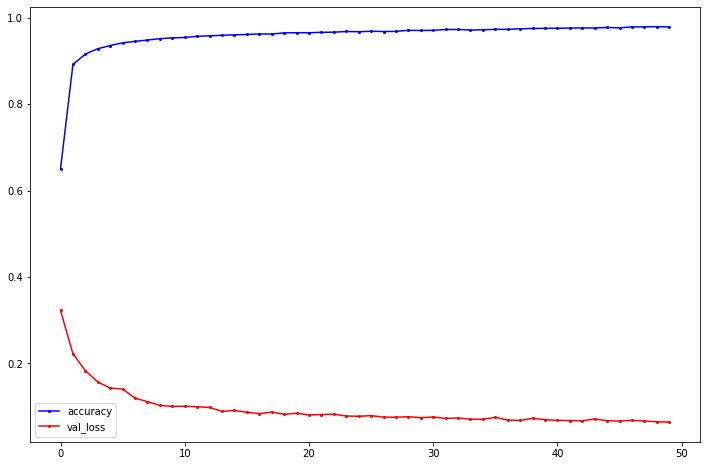

In [18]:
plt.figure(figsize=(12,8))
plt.plot(x_len, y_acc, 'bo-', markersize=2, label='accuracy')
plt.plot(x_len, y_vloss, 'ro-', markersize=2, label='val_loss')
plt.legend()
plt.show()